# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Řešení

Naimportujeme knihovny.

In [1]:
#main libs
import pandas as pd
import numpy as np

#neural network lib
import torch
import torch.nn as nn
import torch.nn.functional as F

#support libs
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler

#plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Průzkum dat

Pomocí ```read_csv()``` a načteme data ze souboru ```train.csv```

In [2]:
data = pd.read_csv("train.csv")
data.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,4,4,4,4,4,4,5,5,5,6,...,4,4,4,4,4,4,4,4,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


Zjistíme základnou informaci o datasetu pomoci  `info()`

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 437.9 MB


None

* Dataset má celkem 56000 záznamu a 1025 příznaků včetně vysvětlováné proměnné. Tedy každý obrázek je 32x32 pixelů, celkem 1024 proměnné. Všechny proměnné jsou numerické(mají typ `int64`).
* Taky ověříme, zda dataset obsahuje `NaN` hodnoty.

In [4]:
data.isnull().values.any()

False

* Dataset neobsahuje `NaN` hodnoty.
* Zjistíme počet záznamu pro jednotlivé třídy v vysvětlované proměnné **Label**. Vykreslíme na to sloupcový graf.

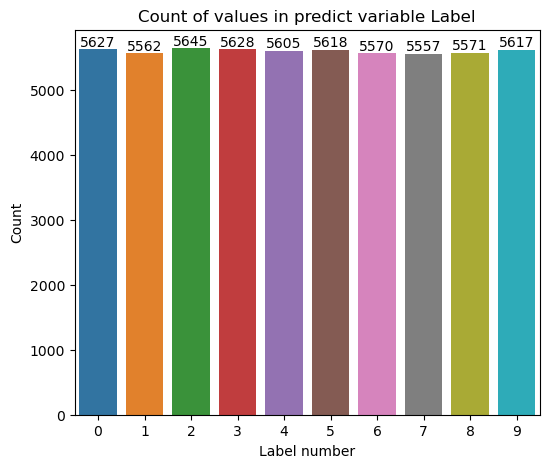

In [5]:
f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)
sns.barplot(x=data["label"].value_counts().index, y=data["label"].value_counts().values)
ax.set_title("Count of values in predict variable Label")
ax.bar_label(ax.containers[0]) #print values over the columns
ax.set_xlabel("Label number")
ax.set_ylabel("Count")
plt.show()

* Všechny třídy mají skoro stejný počet záznamů.
* Oddělime vysvětlovanou proměnnu `label`, kterou budeme predikovat.

In [6]:
Xdata = data.drop("label", axis = 1)
ydata = data.label

Zjistíme taky maximální a minimální hodnotu mezi všemi příznaky.

In [7]:
print("Maximum value is ", Xdata.to_numpy().max())
print("Minimum value is ", Xdata.to_numpy().min())

Maximum value is  255
Minimum value is  0


* Rozsah hodnot je od 0 do 255 což odpovídá rozsahu hodnot pro barvu pixelu.
* Vykreslíme obrázky pro jednotlivé třídy použitím metody `imshow()`

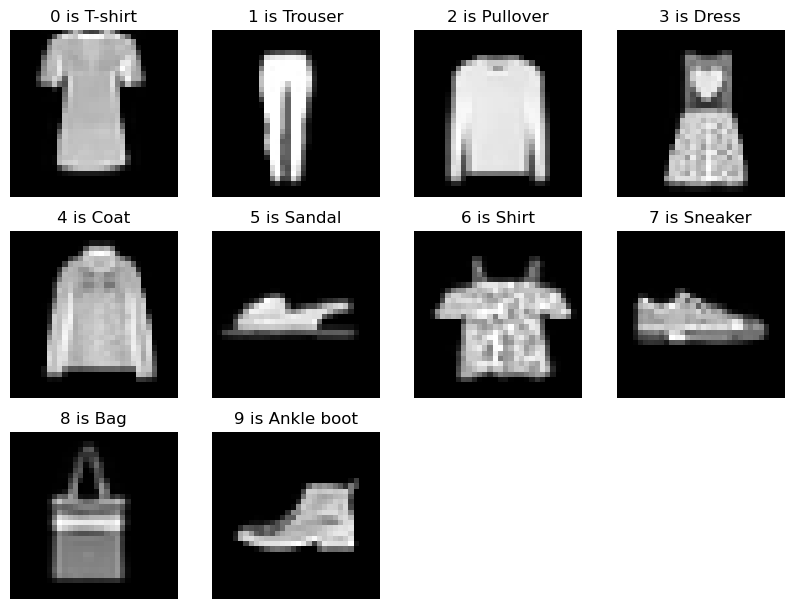

In [8]:
names = {0: 'T-shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
         5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
f = plt.figure(figsize=(10, 10))
for i in range(0, 10):
    f.add_subplot(4, 4, i+1)
    plt.imshow(Xdata[data.label == i].iloc[0].values.reshape(32,32), cmap='gray', interpolation='none')
    plt.title(f"{i} is {names[i]}")
    plt.axis("off")
plt.show()

Z obrázků vidíme, že budeme predikovat zda je na obrázku tričko, kalhoty, pulovr, šaty, kabát, sandál, košile, tenisky, taška nebo bota.

### Příprava dat

Převedeme oba dataframy na `numpy` pole, aby se dal převést je na tenzory.

In [9]:
Xdata = Xdata.to_numpy()
ydata = ydata.to_numpy()

Zároveň reshapeneme `Xdata`, to se nám bude hodit při práci s konvoluční síti, kde budeme potřebovat kanály. Máme černo-bílé obrázky proto kanál bude jenom jeden.

In [10]:
print(Xdata.shape)          
Xdata_reshape = Xdata.reshape(56000,1,32,32)
print(Xdata_reshape.shape)

(56000, 1024)
(56000, 1, 32, 32)


Pomoci `TensorDataset` převedeme dataset na tenzory. Zároveň změníme datatypy na `float` a `long`, to se vyplatí při vytváření neutronové sítě(pytorch potřebuje jenom jich).

In [11]:
dataset = torch.utils.data.TensorDataset(torch.tensor(Xdata_reshape, dtype = torch.float), torch.tensor(ydata, dtype = torch.long))
dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor(7))

* Rozdělíme data na validační, trénovací a testovací pomocí ```torch.utils.data.random_split```. Rozdělení:
    * 70% - trénovací
    * 15% - validační
    * 15% - testovací
* Použijeme zároveň `torch.Generator().manual_seed()`, aby zajistit náhodné rozdělení dat mezi trénovací, validační a testovací množinou.

In [12]:
random_seed = torch.Generator().manual_seed(42)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = int(0.15 * len(dataset))
Xtrain, Xval, Xtest = torch.utils.data.random_split(dataset, [train_size, val_size, test_size], random_seed)
print(f"Train size: {len(Xtrain)}")
print(f"Val size: {len(Xval)}")
print(f"Test size: {len(Xtest)}")

Train size: 39200
Val size: 8400
Test size: 8400


Připravíme data pro dávkové učení pomocí `torch.utils.data.DataLoader`. Velikost dávky pro trénovací množinu zvolíme 32 datové body, pro validační a testovací 128. Taky pomoci parametru `shuffle` po jedné iteraci všech dávek promícháme data v trénovací množině. To bude docela podstatné pro trénování.

In [13]:
train_loader = torch.utils.data.DataLoader(Xtrain, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(Xval, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(Xtest, batch_size=128, shuffle=False)

Ověříme trénovací dávku

In [14]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 32, 32])
torch.Size([32])


Vypadají v pohodě. Celkem tedy 32 obrázku a 32 labelu.

### Standardizace a normalizace dat

Z toho důvodu, že pracujeme s obrazovými daty, nemá smysl dělat normalizace a standardizace po sloupcích. Proto provedeme tyto úpravy na celém datasetu najednou. Víme, že maximum bude vždy  255, minimum bude 0.

**MinMax normalizace**

Postup pro provedení Min-Max normalizace je následující:

$x_i = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}} = \frac{x_i - 0}{255 - 0} = \frac{x_i}{255}$,  kde $x_i$ představuje hodnotu jednoho pixelu v jednom obrazu

In [15]:
#Normalization
Xdata_MinMax = Xdata.astype('float64')
for x in range(Xdata.shape[0]):
    for y in range(Xdata.shape[1]):
        Xdata_MinMax[x][y] = Xdata_MinMax[x][y] / 255

Provedeme stejné kroky jako pro původní data.

In [16]:
Xdata_MinMax = Xdata_MinMax.reshape(56000,1,32,32)
dataset_Min_Max = torch.utils.data.TensorDataset(torch.tensor(Xdata_MinMax, dtype = torch.float), torch.tensor(ydata, dtype = torch.long))
Xtrain_MinMax, Xval_MinMax, Xtest_MinMax = torch.utils.data.random_split(dataset_Min_Max, [train_size, val_size, test_size], random_seed)
train_loader_MinMax = torch.utils.data.DataLoader(Xtrain_MinMax, batch_size=32, shuffle=True)
val_loader_MinMax = torch.utils.data.DataLoader(Xval_MinMax, batch_size=128, shuffle=False)
test_loader_MinMax = torch.utils.data.DataLoader(Xtest_MinMax, batch_size=128, shuffle=False)

**Standardizace**

Postup pro provedení Standardizace je následující:

$x_i = \frac{x_i - \overline{x}}{\sqrt{{s_x}^2}}$ $~~~$ ,kde ${s_x}^2$ je výběrový rozptyl, $\overline{x}$ je výběrový průměr a $x_i$ představuje hodnotu jednoho pixelu v jednom obrazu

Místo výběrového rozptylu můžeme přímo použít směrodatnou odchylku, která je implementována v `numpy`.

In [17]:
print(np.std(Xdata))
print(np.sqrt(np.var(Xdata)))

75.67351268098908
75.67351268098908


In [18]:
#Standardisation
our_mean = np.mean(Xdata)
our_std = np.std(Xdata)
Xdata_Stand = Xdata.astype('float64')
for x in range(Xdata.shape[0]):
    for y in range(Xdata.shape[1]):
        Xdata_Stand[x][y] = (Xdata_Stand[x][y] - our_mean)/our_std

Provedeme stejné kroky jako pro původní data.

In [19]:
Xdata_Stand = Xdata_Stand.reshape(56000,1,32,32)
dataset_Stand = torch.utils.data.TensorDataset(torch.tensor(Xdata_Stand, dtype = torch.float), torch.tensor(ydata, dtype = torch.long))
Xtrain_Stand, Xval_Stand, Xtest_Stand = torch.utils.data.random_split(dataset_Stand, [train_size, val_size, test_size], random_seed)
train_loader_Stand = torch.utils.data.DataLoader(Xtrain_Stand, batch_size=32, shuffle=True)
val_loader_Stand = torch.utils.data.DataLoader(Xval_Stand, batch_size=128, shuffle=False)
test_loader_Stand = torch.utils.data.DataLoader(Xtest_Stand, batch_size=128, shuffle=False)

### Trénovací funkce

* Ještě před konstrukci neuronové sítě vytvoříme dvě funkce pro trénování. 
* Funkce `train_epoch` vezme v cyklu jednu dávku, napočítá výstupy pro tuto dávku (dopředný chod), vypočítá hodnotu ztrátové funkce, vypočítá gradienty a pomocí zvoleného optimalizátoru provede jeden krok gradientního sestupu. Na konci vrátí hodnotu ztrátové funkce pro celou trénovací množinu. 

In [20]:
def train_epoch(model, loss_fn, optimizer, activation_function, data_loader):
    running_cum_loss = 0
    
    for data in data_loader:
        
        inputs, labels = data
        
        optimizer.zero_grad() #Sets the gradients of all optimized torch Tensors to zero.
        outputs = model(inputs, activation_function) #forward
        loss = loss_fn(outputs, labels) #compute loss
        loss.backward() #backward prop
        optimizer.step() #step of input optimizer
        
        #find train loss after one epoch and return it
        last_mean_loss = loss.item() #get loss on this batch
        running_cum_loss += last_mean_loss * inputs.shape[0] #sum of multiplys loss*size_of_batch(last batch not always 32) for compute average train loss
    return running_cum_loss / len(Xtrain) #return average train loss after one epoch

* Funkce `trainNN` natrénuje model přes `epoch_count` epoch, vypočítá hodnotu ztrátové funkce na validačních datech a zobrazí výsledek (ve formátu podobném těm, které jsme používali na cvičeních), pokud je parametr `printInfo` nastaven na `True`. 
    * Parametr `acc_arr` je list, do kterého ukládáme přesnost na validační množinu. Defaultně je nastaven jako `None` a potřebujeme ho pouze při ladění hyperparametrů modelu. 
    * Funkce `train_epoch` potřebuje jako parametr aktivační funkci pro skryté vrstvy (tento parametr budeme ladit), proto zavádíme parametr `activation_function`. Defaultně je použita funkce `F.relu`. 
    * Parametr `onEarlyStop` určuje, zda bude použito předčasné zastavení. Defaultně je nastaven jako `False`. 
    * Parametrem `showGraph` určuje, zda se zobrazí graf závislosti hodnoty ztrátové funkce pro trénovací a validační množinu v závislosti na počtu epoch. Defaultně je `False`.
    * Dva poslední parametry určují, jaká data budou použita. Hodí se to dále na normalizovaná a standardizovaná data. Defaultně jsou nastevené na nemodifikovana data.
* Předčasné zastavení bude prováděno následovně: pokud je trénovací loss pro tuto epochu menší než `best_vloss` (na začátku je nastaven na obrovské číslo), uložíme model a vynulujeme proměnnou `max_worse`. Pokud tomu tak není, zvýšíme `max_worse` o jedničku a pokud po 9 iteracích nenalezneme lepší model, ukončíme iterování.

In [21]:
def trainNN(model, loss_fn, optimizer, epoch_count, printInfo=False, 
            acc_arr=None, activation_function=F.relu, onEarlyStop=False, showGraph=False, 
            train_data_loader=train_loader, val_data_loader=val_loader):
    
    best_vloss = 1000000. #for early stopping
    max_worse = 0
    #for graph
    train_loss = []
    validation_loss = []

    for epoch in range(epoch_count):
        
        #Train on (gradient tracking is on)
        model.train(True)
        
        #train one epoch
        avg_loss = train_epoch(model, loss_fn, optimizer, activation_function, train_data_loader)

        #Train off to do reporting
        model.train(False)

        #Compute validation loss and accuraccy on validation data
        running_cum_vloss = 0.0
        vcorrect = 0
        for vdata in val_data_loader:
            vinputs, vlabels = vdata
            #get loss on validation data(same computation like in train_epoch for train data) 
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            #get count the correctly classified samples on val data
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        #get average loss
        avg_vloss = running_cum_vloss / len(Xval)
        #get accuraccy 
        vacc = vcorrect / len(Xval)
        
        #append accuraccy in list for tuning
        if (acc_arr != None):
            acc_arr.append(torch.round(vacc, decimals=3))
        
        #early stopping 
        if(onEarlyStop == True):
            #If 9 times in a row loss is not higher then existent best loss
            if(max_worse >= 9):
                break
                
            #If current loss is lower than best loss, save model
            if avg_vloss < best_vloss:
                best_vloss = avg_vloss
                model_path = "saves/best_model.pt"
                torch.save(model.state_dict(), model_path)
                max_worse = 0
                print("Best model saved")
            else:
                max_worse += 1 
        
        #append values of loss for train and val data
        validation_loss.append(avg_vloss)
        train_loss.append(avg_loss)
        
        #print info by one epoch 
        if(printInfo == True):
            print(f"EPOCH {epoch + 1}: ")
            print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")
    
    #show graph of train and validation loss by epochs 
    if(showGraph == True):
        plt.plot(train_loss,'or-')
        plt.plot(validation_loss,'ob-')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(['train loss', 'validation loss'])
        plt.show()

### Dopředná neuronová síť 

* **Vhodnost použití dopředné neuronové sítě pro klasifikaci obrazových dat**: 
    * Hlavní výhodou neuronových sítí je jejich obecnost a flexibilita pro zpracování různých typů vstupních dat. Konstrukce sítě, včetně počtu neuronů a vrstev, je součástí trénování modelu.
    * Neuronová síť je schopna zachytit složitou strukturu dat, což je výhoda oproti jiným modelům. Dopředná neuronová síť, nemá přímý přístup k prostorovým informacím v obrazech a zpracovává data jako jednorozměrný vektor. To může omezovat schopnost zachycení prostorových informací v obrazech a vést k horšímu výkonu při klasifikaci obrazových dat. Přestože dopředné neuronové sítě nezachovávají prostorové informace jako konvoluční sítě, jsou schopny vytvářet sofistikované příznaky, i když pro tyto účely vyžadují více parametrů.

#### Počet vrstev a neuronů

* Zkusime teď zkonstruovat dva modely **ForwardNN** a **ForwardNN2**. 

* **ForwardNN** bude představovat dopřednou neuronovou síť, ve které bude stejný počet neuronů v každé vrstvě. Pro vytvoření této sítě použijeme `nn.ModuleList()`, což nám umožní mít dynamický počet vrstev. Při inicializaci objektu `ForwardNN` předáme parametry: `hidden_layers_count` (počet vrstev), `neuron_count` (počet neuronů) a způsob inicializace vah (`start_weight`, defaultně je `kaiming_uniform_`, což je defaultně v PyTorch). V metodě `forward` také předáme aktivační funkci pro skryté vrstvy (defaultně je `F.relu`). Jako ztrátovou funkci použijeme katekorickou relativní entropii(`torch.nn.CrossEntropyLoss`), která v `pytorch` už má softmax(máme úlohu klasifikace do více tříd.) v sobě. Tedy na výstupně vrstvě necháme neurony bez aktivační funkce.

In [22]:
class ForwardNN(nn.Module):
    def __init__(self, hidden_layers_count, neuron_count, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.layers = nn.ModuleList() #for hidden_layers_count layers
        self.layers.append(nn.Linear(32*32, neuron_count))
        if(hidden_layers_count > 1):
            for i in range(1, hidden_layers_count):
                self.layers.append(nn.Linear(neuron_count, neuron_count))
        for hd in self.layers:
            start_weight(hd.weight)
        self.output = nn.Linear(neuron_count, 10)
        start_weight(self.output.weight)
        
    def forward(self, x, activation_function=F.relu):
        x = x.flatten(1) #because we have data in shape [32, 1, 32, 32] in one batch 
        for hl in self.layers:
            x = activation_function(hl(x))
        x = self.output(x)
        return x


* Vytvoříme pomocnou funkci `find_nl_count`, pomocí které zjistíme optimální počet neuronů a vrstev pro `ForwardNN`. Při ladění využijeme `ParameterGrid`. Nebudeme používat příliš mnoho neuronů a vrstev, protože máme relativně malou trénovací množinu a omezené výpočetní prostředky. Ladění provedeme na první epoše z důvodu omezených výpočetních možností.
* Jako optimizer použijeme **Adam**. Zvolil jsem ho, protože je docela výkonný ve srovnání s jinými optimalizátory. Také proto, že nemohu současně ladit jak počet neuronů a vrstev, tak i parametry spojené s optimalizátorem, kvůli omezeným výpočetním možnostem.
* Na vizualizaci vzsledků použijeme heatmapu. Vytvoříme také pomocný slovník, do kterého budeme zaznamenávat hodnotu ztrátové funkce na validační množinu pro různé kombinace neuronů a vrstev. Poté ho převedeme na dataframe a použijeme na něj metodu `pivot_table`, kterou vyžaduje `seaborn` pro zobrazení heatmapy.

In [23]:
def find_nl_count():
    val_acc = [] 
    results = {'neurons': [], 'layers': [], 'accuraccy': []}
    
    hyperparam_dict = {
        'layers': [1, 2, 3, 4],
        'neurons': [32, 64, 128, 256],
    }
    param = ParameterGrid(hyperparam_dict)
    
    #find parameters
    for hyp in param:
        model_tune = ForwardNN(hyp['layers'], hyp['neurons'])
        loss_fn_t = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model_tune.parameters())
        trainNN(model_tune, loss_fn_t, optimizer, 1, acc_arr=val_acc)
        results['neurons'].append(hyp['neurons'])
        results['layers'].append(hyp['layers'])
    
    #get parameters with highest accuraccy
    print("Tuning ended")
    best_params = param[np.argmax(val_acc)]
    print('best params ', best_params)
    
    #create heatmap
    results['accuraccy'] = val_acc
    param_df = pd.DataFrame(results)
    param_df = param_df.pivot_table(values='accuraccy', index='layers', columns='neurons')
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(param_df, annot=True, fmt=".3f", cmap="Reds", linewidth=.5, cbar_kws={'label': 'accuraccy'})
    plt.show()
    
    return best_params

Zavoláme funkci.

Tuning ended
best params  {'neurons': 256, 'layers': 4}


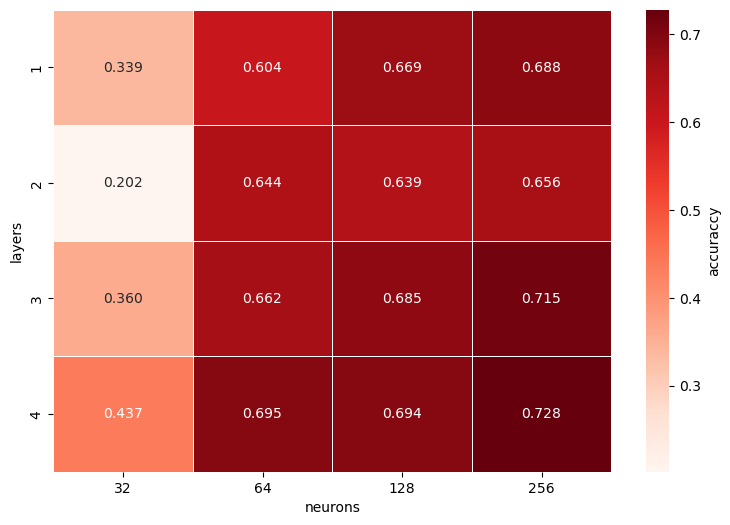

In [24]:
bp = find_nl_count()

* Z heatmapy zjistíme, že nejlepší výsledky dosahují hlubší sítě. Dále je možné pozorovat, že při zvětšení počtu neuronů ve vrstvách potřebujeme méně vrstev pro dosažení relativně dobrých výsledků.
* Na získaných parametrech provedeme trénování po dobu 10 epoch.

EPOCH 1: 
TRAIN loss: 2.938, VALIDATION loss: 0.778, accuraccy: 0.733
EPOCH 2: 
TRAIN loss: 0.723, VALIDATION loss: 0.676, accuraccy: 0.749
EPOCH 3: 
TRAIN loss: 0.653, VALIDATION loss: 0.680, accuraccy: 0.751
EPOCH 4: 
TRAIN loss: 0.616, VALIDATION loss: 0.607, accuraccy: 0.788
EPOCH 5: 
TRAIN loss: 0.577, VALIDATION loss: 0.573, accuraccy: 0.790
EPOCH 6: 
TRAIN loss: 0.549, VALIDATION loss: 0.552, accuraccy: 0.797
EPOCH 7: 
TRAIN loss: 0.532, VALIDATION loss: 0.547, accuraccy: 0.803
EPOCH 8: 
TRAIN loss: 0.511, VALIDATION loss: 0.534, accuraccy: 0.806
EPOCH 9: 
TRAIN loss: 0.497, VALIDATION loss: 0.507, accuraccy: 0.817
EPOCH 10: 
TRAIN loss: 0.489, VALIDATION loss: 0.593, accuraccy: 0.804


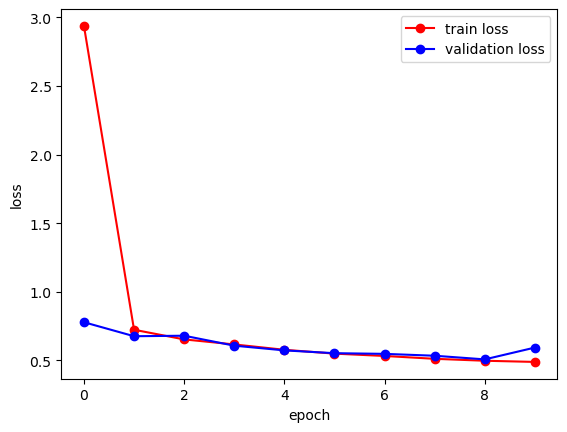

In [25]:
model_best = ForwardNN(bp['layers'], bp['neurons'])
loss_fn_b = torch.nn.CrossEntropyLoss()
optimizer_b = torch.optim.Adam(model_best.parameters())
trainNN(model_best, loss_fn_b, optimizer_b, 10, printInfo=True, showGraph=True)

Po deseti epochách trénování se přesnost zvýšila o 0.1, což je poměrně dobrý výsledek. Podle grafu lze říct, že nedošlo k přeučení během 10 epoch. Nyní vyzkoušíme jinou architekturu neuronové sítě.

* **ForwardNN2** už obsahuje statické množství vrstev a neuronů a ma oproti ForwardNN jiný tvar. První skryta vrstvá obsahuje 256 neuronů, druha 128, třeti 64. Celkem mamé jenom 3 skryté vrstvy.

In [54]:
class ForwardNN2(nn.Module):
    def __init__(self, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.layer1 = nn.Linear(32*32, 256)
        start_weight(self.layer1.weight)
        
        self.layer2 = nn.Linear(256, 128)
        start_weight(self.layer2.weight)
        
        self.layer3 = nn.Linear(128, 64)
        start_weight(self.layer3.weight)
        
        self.output = nn.Linear(64, 10)
        start_weight(self.output.weight)
        
    def forward(self, x, activation_function=F.relu):
        x = x.flatten(1)
        x = activation_function(self.layer1(x))
        x = activation_function(self.layer2(x))
        x = activation_function(self.layer3(x))
        x = self.output(x)
        return x


Provedeme trénování po dobu 10 epoch.

EPOCH 1: 
TRAIN loss: 3.021, VALIDATION loss: 0.891, accuraccy: 0.716
EPOCH 2: 
TRAIN loss: 0.773, VALIDATION loss: 0.720, accuraccy: 0.746
EPOCH 3: 
TRAIN loss: 0.685, VALIDATION loss: 0.709, accuraccy: 0.752
EPOCH 4: 
TRAIN loss: 0.627, VALIDATION loss: 0.597, accuraccy: 0.788
EPOCH 5: 
TRAIN loss: 0.590, VALIDATION loss: 0.690, accuraccy: 0.748
EPOCH 6: 
TRAIN loss: 0.564, VALIDATION loss: 0.580, accuraccy: 0.799
EPOCH 7: 
TRAIN loss: 0.544, VALIDATION loss: 0.528, accuraccy: 0.812
EPOCH 8: 
TRAIN loss: 0.517, VALIDATION loss: 0.548, accuraccy: 0.813
EPOCH 9: 
TRAIN loss: 0.499, VALIDATION loss: 0.578, accuraccy: 0.805
EPOCH 10: 
TRAIN loss: 0.481, VALIDATION loss: 0.508, accuraccy: 0.821


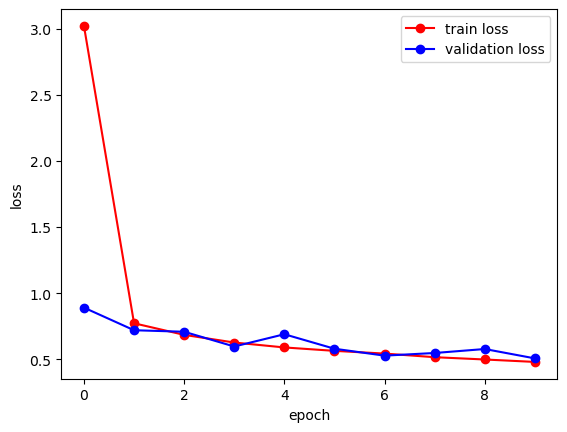

In [55]:
model_best0 = ForwardNN2()
loss_fn_b0 = torch.nn.CrossEntropyLoss()
optimizer_b0 = torch.optim.Adam(model_best0.parameters())
trainNN(model_best0, loss_fn_b0, optimizer_b0, 10, printInfo=True, showGraph=True)

Výsledek je téměř stejný, takže můžeme nadále používat jak `ForwardNN2`, tak i `ForwardNN`. Zkusíme dále ladit `ForwardNN2`.

#### Optimalizace

* Vytvoříme funkci `find_init_params`, která nám pomůže ladit inicializaci vah a aktivační funkci pro skryté vrstvy. Rozhraní funkce je podobné jako u funkce `find_nl_count`, ale navíc předáváme jako parametr(`NN`) model neuronové sítě, aby tuto funkci bylo možné použít vícekrát.
* Na inicializaci vah vyzkoušíme několik nejpopulárnějších přístupů. Budeme zkoušet hodnoty vah z normálního nebo uniformního rozdělení, všechny nuly a také sofistikovanější metody jako Xavier normal nebo Xavier uniform.
* Jako aktivační funkce pro skryté vrstvy vyzkoušíme 4 nejznámější funkce, tedy ReLU, Leaky ReLU, SELU a hyperbolický tangent.

In [25]:
def find_init_params(NN):
    val_acc = []
    hyperparam_dict = {
        'start_weight': [torch.nn.init.uniform_, torch.nn.init.normal_, torch.nn.init.zeros_, 
                          torch.nn.init.xavier_normal_, torch.nn.init.xavier_uniform_],
        'activation': [F.relu, F.leaky_relu, F.selu, torch.tanh],
    }
    param = ParameterGrid(hyperparam_dict)

    for hyp in param:
        model_tune = NN(start_weight = hyp['start_weight'])
        loss_fn_t = torch.nn.CrossEntropyLoss()
        optimizer_t = torch.optim.Adam(model_tune.parameters())
        trainNN(model_tune, loss_fn_t, optimizer_t, 1, acc_arr=val_acc, activation_function=hyp['activation'])

    print("Tuning ended")
    best_params = param[np.argmax(val_acc)]
    print('best params ', best_params)
    return best_params

Zavoláme funkci na `ForwardNN2`.

In [57]:
bp2 = find_init_params(ForwardNN2)

Tuning ended
best params  {'start_weight': <function xavier_normal_ at 0x000002BF381CA7A0>, 'activation': <function relu at 0x000002BF38146A70>}


Na získaných parametrech provedeme trénování po dobu 10 epoch.

EPOCH 1: 
TRAIN loss: 2.233, VALIDATION loss: 0.728, accuraccy: 0.741
EPOCH 2: 
TRAIN loss: 0.677, VALIDATION loss: 0.647, accuraccy: 0.766
EPOCH 3: 
TRAIN loss: 0.619, VALIDATION loss: 0.606, accuraccy: 0.785
EPOCH 4: 
TRAIN loss: 0.593, VALIDATION loss: 0.612, accuraccy: 0.791
EPOCH 5: 
TRAIN loss: 0.562, VALIDATION loss: 0.608, accuraccy: 0.790
EPOCH 6: 
TRAIN loss: 0.553, VALIDATION loss: 0.531, accuraccy: 0.811
EPOCH 7: 
TRAIN loss: 0.521, VALIDATION loss: 0.592, accuraccy: 0.791
EPOCH 8: 
TRAIN loss: 0.500, VALIDATION loss: 0.583, accuraccy: 0.801
EPOCH 9: 
TRAIN loss: 0.493, VALIDATION loss: 0.534, accuraccy: 0.810
EPOCH 10: 
TRAIN loss: 0.474, VALIDATION loss: 0.526, accuraccy: 0.817


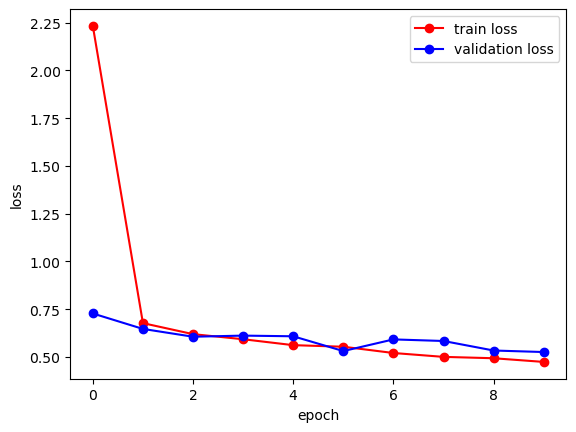

In [58]:
model_best2 = ForwardNN2(start_weight = bp2['start_weight'])
loss_fn_b2 = torch.nn.CrossEntropyLoss()
optimizer_b2 = torch.optim.Adam(model_best2.parameters())
trainNN(model_best2, loss_fn_b2, optimizer_b2, 10, printInfo=True, 
        activation_function=bp2['activation'], showGraph=True)

* Z výsledků vidíme, že změna způsobu inicializace vah na Xavier normal mírně zlepšila výsledek (je dobře vidět na train lossu).
* Zkusíme ještě vyladit optimalizátor. K tomu vytvoříme funkci `find_opt_params`, která postupně vyzkouší nejpopulárnější optimalizátory s různými učícími parametry. Rozhraní funkce zůstává stejné jako u `find_init_params`, ale navíc předáváme již zjištěnou aktivační funkci pro skryté vrstvy a způsob inicializace vah.

In [26]:
def find_opt_params(NN, activation_function, start_weight):
    val_acc = []
    hyperparam_dict = {
        'optimizer': [torch.optim.Adam, torch.optim.Adagrad, torch.optim.RMSprop, 
                      torch.optim.SGD, torch.optim.Adadelta],
        'lr': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    }
    param = ParameterGrid(hyperparam_dict)

    for hyp in param:
        model_tune = NN(start_weight=start_weight)
        loss_fn_t = torch.nn.CrossEntropyLoss()
        optimizer = hyp['optimizer'](model_tune.parameters(), lr=hyp['lr'])
        trainNN(model_tune, loss_fn_t, optimizer, 1, acc_arr=val_acc, activation_function=activation_function)

    print("Tuning ended")
    best_params = param[np.argmax(val_acc)]
    print('best params ', best_params)
    return best_params

Zavoláme funkci na `ForwardNN2`.

In [60]:
bp3 = find_opt_params(ForwardNN2, bp2['activation'], bp2['start_weight'])

Tuning ended
best params  {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 0.001}


Výsledek je překvapivý. Nejlepším optimalizátorem je klasický stochastický gradientní sestup. Na získaných parametrech provedeme trénování po dobu 10 epoch, abychom prozkoumali chování optimalizátoru.

EPOCH 1: 
TRAIN loss: 1.966, VALIDATION loss: 0.739, accuraccy: 0.732
EPOCH 2: 
TRAIN loss: 0.698, VALIDATION loss: 0.686, accuraccy: 0.743
EPOCH 3: 
TRAIN loss: 0.629, VALIDATION loss: 0.635, accuraccy: 0.772
EPOCH 4: 
TRAIN loss: 0.590, VALIDATION loss: 0.623, accuraccy: 0.775
EPOCH 5: 
TRAIN loss: 0.560, VALIDATION loss: 0.622, accuraccy: 0.772
EPOCH 6: 
TRAIN loss: 0.536, VALIDATION loss: 0.598, accuraccy: 0.786
EPOCH 7: 
TRAIN loss: 0.518, VALIDATION loss: 0.572, accuraccy: 0.800
EPOCH 8: 
TRAIN loss: 0.500, VALIDATION loss: 0.571, accuraccy: 0.800
EPOCH 9: 
TRAIN loss: 0.485, VALIDATION loss: 0.580, accuraccy: 0.789
EPOCH 10: 
TRAIN loss: 0.474, VALIDATION loss: 0.559, accuraccy: 0.802


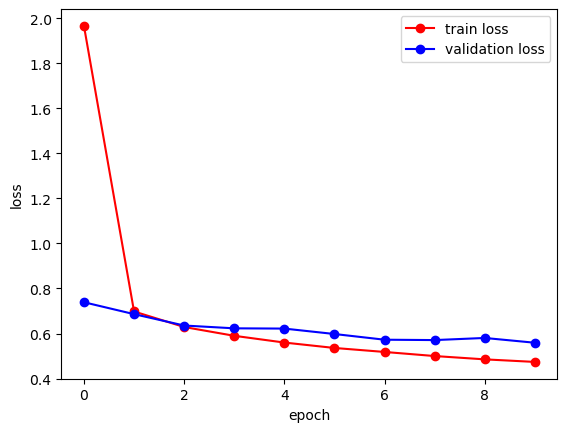

In [61]:
model_best3 = ForwardNN2(start_weight=bp2['start_weight'])
loss_fn_b3 = torch.nn.CrossEntropyLoss()
optimizer_b3 = bp3['optimizer'](model_best3.parameters(), lr=bp3['lr'])
trainNN(model_best3, loss_fn_b3, optimizer_b3, 10, printInfo=True, 
        activation_function=bp2['activation'], showGraph=True)

Výsledek je dobrý, ale zkusíme natrénovat model s použitím optimalizátoru Adam a stejným učícím parametrem.

EPOCH 1: 
TRAIN loss: 2.041, VALIDATION loss: 0.792, accuraccy: 0.730
EPOCH 2: 
TRAIN loss: 0.700, VALIDATION loss: 0.643, accuraccy: 0.768
EPOCH 3: 
TRAIN loss: 0.635, VALIDATION loss: 0.609, accuraccy: 0.785
EPOCH 4: 
TRAIN loss: 0.578, VALIDATION loss: 0.600, accuraccy: 0.794
EPOCH 5: 
TRAIN loss: 0.553, VALIDATION loss: 0.587, accuraccy: 0.778
EPOCH 6: 
TRAIN loss: 0.527, VALIDATION loss: 0.517, accuraccy: 0.813
EPOCH 7: 
TRAIN loss: 0.507, VALIDATION loss: 0.516, accuraccy: 0.813
EPOCH 8: 
TRAIN loss: 0.490, VALIDATION loss: 0.516, accuraccy: 0.814
EPOCH 9: 
TRAIN loss: 0.479, VALIDATION loss: 0.492, accuraccy: 0.819
EPOCH 10: 
TRAIN loss: 0.457, VALIDATION loss: 0.524, accuraccy: 0.814


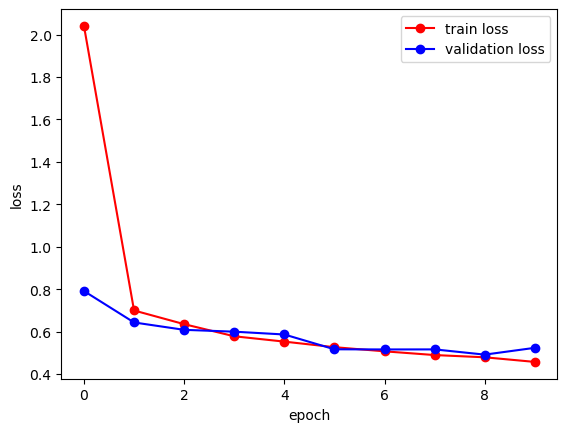

In [63]:
model_best4 = ForwardNN2(start_weight=bp2['start_weight'])
loss_fn_b4 = torch.nn.CrossEntropyLoss()
optimizer_b4 = torch.optim.Adam(model_best4.parameters(), lr=bp3['lr'])
trainNN(model_best4, loss_fn_b4, optimizer_b4, 10, printInfo=True, 
        activation_function=bp2['activation'], showGraph=True)

Z výsledků můžeme jistě říct, že Adam se stejným učícím parametrem je lepší. Proto pro finální model zvolíme právě tento optimalizátor. Při validaci se objevil problém s přesností po první epoše, kde Adam byl mírně horší, ale od šesté epochy je téměř o 0.01 lepší než stochastický gradientní sestup.

#### Regularizace

Teď zkusíme použít několik regularizačních technik.

* **Dropout**

Dropout je efektivní regularizační technika, která se často používá v neuronových sítích. Dropout nutí síť rozhodovat se na základě širokého spektra informací tím, že náhodně deaktivuje některé neurony během trénování. Tímto způsobem síť musí naučit se spoléhat na různé aspekty dat a zlepšuje se její schopnost generalizace. Vyzkoušejme tedy použít dropout na druhé skryté vrstvě.

* **Dávková normalizace**

Davková normalizace pomáhá stabilizovat a zlepšit model tím, že normalizuje vstupní data tak, aby měla nulový průměr a jednotkový rozptyl přes jednotlivé dávky. Tím se snižuje závislost na počátečních hodnotách vah, což umožňuje rychlejší a stabilnější učení sítě. Ke snížení redundance vypneme intercepty. Davkovou normalizaci aplikujeme na všechny vrstvy.

* **Předčasné zastavení**

Předčasné zastavení již máme implementováno ve funkci `trainNN`, stačí jej pouze aktivovat parametrem `onEarlyStop`. Předčasné zastavení může zabránit přeučení modelu a zkrátit dobu trénování(vyhneme se tím zkoušení epoch, které by již nepřinesly žádné zlepšení).

In [64]:
class ForwardNNFin(nn.Module):
    def __init__(self, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.layer1 = nn.Linear(32*32, 256, bias=False)
        start_weight(self.layer1.weight)
        self.layer1_bn = nn.BatchNorm1d(256)
        
        self.layer2 = nn.Linear(256, 128, bias=False)
        start_weight(self.layer2.weight)
        self.layer2_bn = nn.BatchNorm1d(128)
        
        self.layer2_drop = nn.Dropout1d(p=0.2)
        
        self.layer3 = nn.Linear(128, 64, bias=False)
        start_weight(self.layer3.weight)
        self.layer3_bn = nn.BatchNorm1d(64)
        
        self.output = nn.Linear(64, 10)
        start_weight(self.output.weight)
        
    def forward(self, x, activation_function=F.relu):
        x = x.flatten(1)
        x = self.layer1(x)
        x = activation_function(self.layer1_bn(x))
        x = self.layer2(x)
        x = activation_function(self.layer2_bn(x))
        x = self.layer2_drop(x)
        x = self.layer3(x)
        x = activation_function(self.layer3_bn(x))
        x = self.output(x)
        return x


Všechny hyperparametry jsme již ověřili pomocí validace, proto natrénujeme model s těmito hodnotami. Zvolíme 15 epoch pro trénování.

Best model saved
EPOCH 1: 
TRAIN loss: 1.011, VALIDATION loss: 0.579, accuraccy: 0.799
Best model saved
EPOCH 2: 
TRAIN loss: 0.879, VALIDATION loss: 0.515, accuraccy: 0.817
Best model saved
EPOCH 3: 
TRAIN loss: 0.840, VALIDATION loss: 0.469, accuraccy: 0.836
Best model saved
EPOCH 4: 
TRAIN loss: 0.806, VALIDATION loss: 0.456, accuraccy: 0.831
EPOCH 5: 
TRAIN loss: 0.784, VALIDATION loss: 0.465, accuraccy: 0.829
Best model saved
EPOCH 6: 
TRAIN loss: 0.761, VALIDATION loss: 0.432, accuraccy: 0.844
EPOCH 7: 
TRAIN loss: 0.742, VALIDATION loss: 0.436, accuraccy: 0.839
Best model saved
EPOCH 8: 
TRAIN loss: 0.734, VALIDATION loss: 0.420, accuraccy: 0.846
Best model saved
EPOCH 9: 
TRAIN loss: 0.718, VALIDATION loss: 0.405, accuraccy: 0.854
EPOCH 10: 
TRAIN loss: 0.706, VALIDATION loss: 0.412, accuraccy: 0.852
Best model saved
EPOCH 11: 
TRAIN loss: 0.696, VALIDATION loss: 0.403, accuraccy: 0.852
Best model saved
EPOCH 12: 
TRAIN loss: 0.689, VALIDATION loss: 0.402, accuraccy: 0.858
EPOC

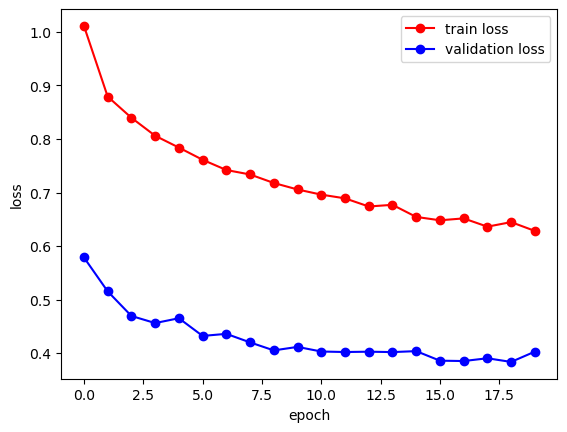

In [68]:
model_fin_forward = ForwardNNFin(start_weight=bp2['start_weight'])
loss_fn_fin_forward = torch.nn.CrossEntropyLoss()
optimizer_fin_forward = torch.optim.Adam(model_fin_forward.parameters(), lr=bp3['lr'])
trainNN(model_fin_forward, loss_fn_fin_forward, optimizer_fin_forward, 20, printInfo=True, 
        activation_function=bp2['activation'], onEarlyStop=True, showGraph=True)

* Z výsledků lze jistě říct, že regularizace přináší významné zlepšení. Po aplikaci všech regularizačních metod jsme dosáhli nárůstu přesnosti o 0.05, což je velmi dobrý výsledek. Také je důležité si uvědomit, že pokud budeme trénovat déle, pravděpodobně dosáhneme ještě lepší přesnosti. Pokud se tento model ukáže jako nejlepší, můžeme jej natrénovat na větším počtu epoch.
* Načteme nejlepší model

In [69]:
model_fin_forward.load_state_dict(torch.load("saves/best_model.pt"))

<All keys matched successfully>

#### Dopředná neuronová síť pro standardizovaná a normalizovaná data

Na finálním modelu dopředné neuronové sítě vyzkoušíme normalizovaná a standardizovaná data. Kód je v podstatě stejný jako dříve, jenom teď předáváme normalizovaná data do funkce `trainNN`.

**Normalizace**

EPOCH 1: 
TRAIN loss: 1.018, VALIDATION loss: 0.556, accuraccy: 0.805
EPOCH 2: 
TRAIN loss: 0.879, VALIDATION loss: 0.511, accuraccy: 0.811
EPOCH 3: 
TRAIN loss: 0.831, VALIDATION loss: 0.493, accuraccy: 0.816
EPOCH 4: 
TRAIN loss: 0.802, VALIDATION loss: 0.468, accuraccy: 0.834
EPOCH 5: 
TRAIN loss: 0.789, VALIDATION loss: 0.450, accuraccy: 0.837
EPOCH 6: 
TRAIN loss: 0.764, VALIDATION loss: 0.424, accuraccy: 0.847
EPOCH 7: 
TRAIN loss: 0.743, VALIDATION loss: 0.412, accuraccy: 0.855
EPOCH 8: 
TRAIN loss: 0.733, VALIDATION loss: 0.430, accuraccy: 0.845
EPOCH 9: 
TRAIN loss: 0.712, VALIDATION loss: 0.413, accuraccy: 0.850
EPOCH 10: 
TRAIN loss: 0.706, VALIDATION loss: 0.409, accuraccy: 0.850


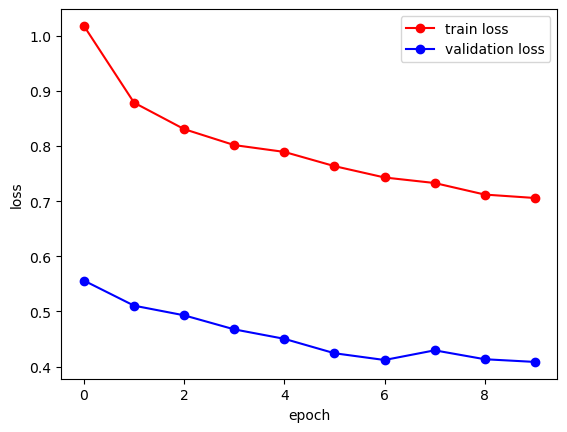

In [71]:
model_fin_forward_Norm = ForwardNNFin(start_weight=bp2['start_weight'])
loss_fn_fin_forward_Norm = torch.nn.CrossEntropyLoss()
optimizer_fin_forward_Norm = torch.optim.Adam(model_fin_forward_Norm.parameters(), lr=bp3['lr'])
trainNN(model_fin_forward_Norm, loss_fn_fin_forward_Norm, optimizer_fin_forward_Norm, 10, printInfo=True, 
        activation_function=bp2['activation'], showGraph=True, 
        train_data_loader=train_loader_MinMax, val_data_loader=val_loader_MinMax)

Model s MinMax normalizací dosahuje téměř stejných výsledků jako model na původních datech. Vzhledem k preferenci jednoduchých modelů nebudeme používat normalizaci. 

**Standardizace**

EPOCH 1: 
TRAIN loss: 1.015, VALIDATION loss: 0.598, accuraccy: 0.785
EPOCH 2: 
TRAIN loss: 0.881, VALIDATION loss: 0.525, accuraccy: 0.807
EPOCH 3: 
TRAIN loss: 0.829, VALIDATION loss: 0.496, accuraccy: 0.822
EPOCH 4: 
TRAIN loss: 0.802, VALIDATION loss: 0.485, accuraccy: 0.824
EPOCH 5: 
TRAIN loss: 0.775, VALIDATION loss: 0.457, accuraccy: 0.832
EPOCH 6: 
TRAIN loss: 0.754, VALIDATION loss: 0.454, accuraccy: 0.830
EPOCH 7: 
TRAIN loss: 0.742, VALIDATION loss: 0.436, accuraccy: 0.844
EPOCH 8: 
TRAIN loss: 0.730, VALIDATION loss: 0.439, accuraccy: 0.834
EPOCH 9: 
TRAIN loss: 0.711, VALIDATION loss: 0.430, accuraccy: 0.841
EPOCH 10: 
TRAIN loss: 0.697, VALIDATION loss: 0.427, accuraccy: 0.843


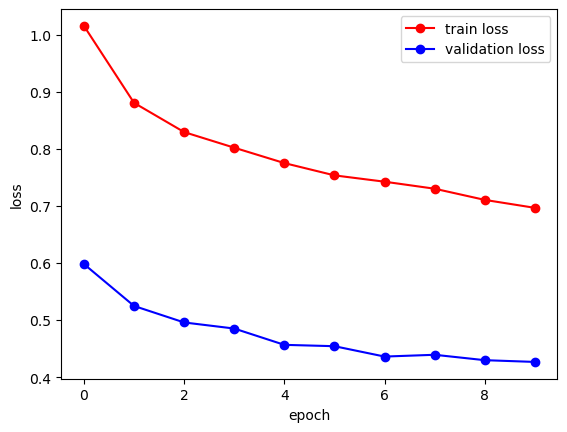

In [73]:
model_fin_forward_Stand = ForwardNNFin(start_weight=bp2['start_weight'])
loss_fn_fin_forward_Stand = torch.nn.CrossEntropyLoss()
optimizer_fin_forward_Stand = torch.optim.Adam(model_fin_forward_Stand.parameters(), lr=bp3['lr'])
trainNN(model_fin_forward_Stand, loss_fn_fin_forward_Stand, optimizer_fin_forward_Stand, 10, printInfo=True, 
        activation_function=bp2['activation'], showGraph=True,
        train_data_loader=train_loader_Stand, val_data_loader=val_loader_Stand)

Standardizace jak i MinMax normalizace nepřináší žádný přírůstek v přesnosti ani snížení hodnoty ztrátové funkce. Proto jako výsledný model dopředné neuronové sítě budeme uvažovat model na původních datech.

### Konvoluční neuronová síť

* **Vhodnost použití konvoluční neuronové sítě pro klasifikaci obrazových dat**:
    * Konvoluční neuronové sítě mají v podstatě stejné výhody jako dopředné sítě, ale navíc jsou schopny zachovávat prostorové informace v obrazech. Oproti dopředným sítím také vyžadují méně parametrů, což je další výhoda. Konvoluční vrstvy slouží k snižení počtu parametrů, ale zároveň zachování  informaci, což ve vysledku zachraňuje model oproti problemu dimenzionality a zvyšuje celkovou přesnost modelu.
    

#### Počet vrstev a neuronů

* Nejprve zkusíme zkonstruovat dva modely, **ConvNN** a **ConvNN2**, na kterých se pokusíme najít vhodnou architekturu sítě.

* **ConvNN** bude obsahovat pouze konvoluční vrstvy a výstupní plně propojenou vrstvu. Použijeme taky max pooling, který zmenší rozměry výstupu a vylepší invarianci vůči malým posunutím. To umožňí síti být odolnější vůči změnám polohy objektu na obrazku. Počet kanálů budeme volit jako mocninu 2. Celkem vytvoříme tři konvoluční vrstvy a jako aktivační funkci pro ně použijeme ReLU. Pro inicializaci vah bude použijeme defaultni pro pytorch Kaiming_uniform.

In [22]:
class ConvNN(nn.Module):
    def __init__(self, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 128, kernel_size = 3)
        start_weight(self.conv1.weight)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv2 = nn.Conv2d(128, 64, 3)
        start_weight(self.conv2.weight)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv3 = nn.Conv2d(64, 32, 3)
        start_weight(self.conv3.weight)
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.output = nn.Linear(32*2*2, 10)
        start_weight(self.output.weight)

    def forward(self, x, activation_function=F.relu):
        x = activation_function(self.conv1(x))
        x = self.pool1(x)
        x = activation_function(self.conv2(x))
        x = self.pool2(x)
        x = activation_function(self.conv3(x))
        x = self.pool3(x)
        x = x.flatten(start_dim = 1)
        x = self.output(x)
        return x


Natrénujeme síť.

EPOCH 1: 
TRAIN loss: 3.066, VALIDATION loss: 1.214, accuraccy: 0.558
EPOCH 2: 
TRAIN loss: 1.022, VALIDATION loss: 0.966, accuraccy: 0.670
EPOCH 3: 
TRAIN loss: 0.863, VALIDATION loss: 0.789, accuraccy: 0.714
EPOCH 4: 
TRAIN loss: 0.760, VALIDATION loss: 0.830, accuraccy: 0.681
EPOCH 5: 
TRAIN loss: 0.708, VALIDATION loss: 0.731, accuraccy: 0.748
EPOCH 6: 
TRAIN loss: 0.666, VALIDATION loss: 0.703, accuraccy: 0.743
EPOCH 7: 
TRAIN loss: 0.620, VALIDATION loss: 0.628, accuraccy: 0.766
EPOCH 8: 
TRAIN loss: 0.579, VALIDATION loss: 0.582, accuraccy: 0.795
EPOCH 9: 
TRAIN loss: 0.546, VALIDATION loss: 0.560, accuraccy: 0.795
EPOCH 10: 
TRAIN loss: 0.520, VALIDATION loss: 0.546, accuraccy: 0.798


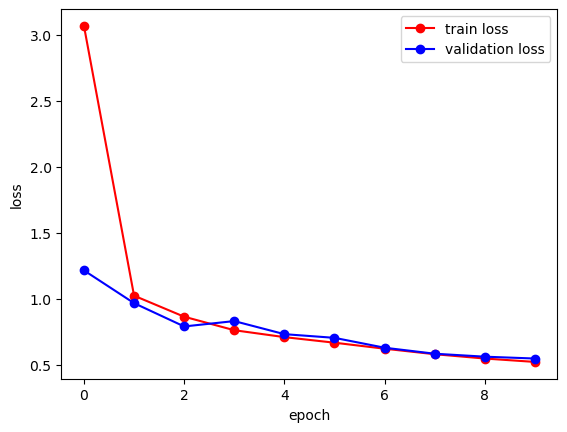

In [84]:
cnn = ConvNN()
loss_fn_cnn = torch.nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(cnn.parameters())
trainNN(cnn, loss_fn_cnn, optimizer_cnn, 10, printInfo=True, showGraph=True)

Výsledek je poměrně špatný, běžná dopředná síť bez ladění hyperparametrů měla lepší výsledek. Z tohoto důvodu se pokusíme kombinovat konvoluční a plně propojené vrstvy.

**ConvNN2**

V nové síťě místo třech konvolučních vrstev ponechame jenom dvě a snižime jim počet kanalů. Místo třetí konvoluční vrstvy přidame tři plně propojené vrstvy(po 256, 128 a 64 neuronů). 

In [23]:
class ConvNN2(nn.Module):
    def __init__(self, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        start_weight(self.conv1.weight)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv2 = nn.Conv2d(64, 32, 3)
        start_weight(self.conv2.weight)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.hd1 = nn.Linear(32*6*6, 256)
        start_weight(self.hd1.weight)
        
        self.hd2 = nn.Linear(256, 128)
        start_weight(self.hd2.weight)
        
        self.hd3 = nn.Linear(128, 64)
        start_weight(self.hd3.weight)
        
        self.output = nn.Linear(64, 10)
        start_weight(self.output.weight)

    def forward(self, x, activation_function=F.relu):
        x = activation_function(self.conv1(x))
        x = self.pool1(x)
        x = activation_function(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = activation_function(self.hd1(x))
        x = activation_function(self.hd2(x))
        x = activation_function(self.hd3(x))
        x = self.output(x)
        return x

Natrénujeme síť.

EPOCH 1: 
TRAIN loss: 2.109, VALIDATION loss: 0.731, accuraccy: 0.732
EPOCH 2: 
TRAIN loss: 0.577, VALIDATION loss: 0.561, accuraccy: 0.788
EPOCH 3: 
TRAIN loss: 0.498, VALIDATION loss: 0.517, accuraccy: 0.813
EPOCH 4: 
TRAIN loss: 0.462, VALIDATION loss: 0.469, accuraccy: 0.824
EPOCH 5: 
TRAIN loss: 0.435, VALIDATION loss: 0.472, accuraccy: 0.836
EPOCH 6: 
TRAIN loss: 0.409, VALIDATION loss: 0.464, accuraccy: 0.830
EPOCH 7: 
TRAIN loss: 0.379, VALIDATION loss: 0.427, accuraccy: 0.848
EPOCH 8: 
TRAIN loss: 0.352, VALIDATION loss: 0.430, accuraccy: 0.849
EPOCH 9: 
TRAIN loss: 0.329, VALIDATION loss: 0.412, accuraccy: 0.859
EPOCH 10: 
TRAIN loss: 0.308, VALIDATION loss: 0.402, accuraccy: 0.866


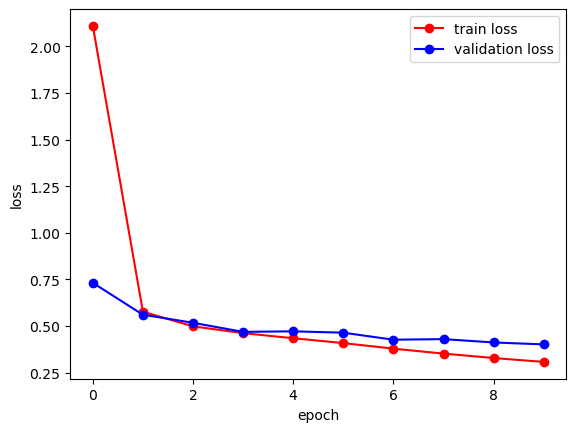

In [118]:
cnn2 = ConvNN2()
loss_fn_cnn2 = torch.nn.CrossEntropyLoss()
optimizer_cnn2 = torch.optim.Adam(cnn2.parameters())
trainNN(cnn2, loss_fn_cnn2, optimizer_cnn2, 10, printInfo=True, showGraph=True)

Výsledek je již mnohem lepší. Bez jakéhokoli ladění optimalizátorů, metody inicializace vah a regularizace jsme dosáhli lepšího výsledku než na finálně laděné dopředné síti. Zkusíme tedy tento výsledek ještě vylepšit a ladit inicializaci vah a aktivační funkci pro skryté vrstvy. K tomu již máme připravenou funkci `find_init_params`, do které pouze dosadíme název neuronové sítě, kterou chceme ladit.

In [28]:
bpCNN = find_init_params(ConvNN2)

Tuning ended
best params  {'start_weight': <function xavier_normal_ at 0x00000284D6852050>, 'activation': <function relu at 0x00000284D67D6320>}


In [29]:
model_conv = ConvNN2(start_weight = bpCNN['start_weight'])
loss_fn_conv = torch.nn.CrossEntropyLoss()
optimizer_conv = torch.optim.Adam(model_conv.parameters())
trainNN(model_conv, loss_fn_conv, optimizer_conv, 10, 
        activation_function = bpCNN['activation'], printInfo=True)

EPOCH 1: 
TRAIN loss: 0.644, VALIDATION loss: 0.417, accuraccy: 0.846
EPOCH 2: 
TRAIN loss: 0.405, VALIDATION loss: 0.388, accuraccy: 0.857
EPOCH 3: 
TRAIN loss: 0.357, VALIDATION loss: 0.365, accuraccy: 0.866
EPOCH 4: 
TRAIN loss: 0.321, VALIDATION loss: 0.380, accuraccy: 0.861
EPOCH 5: 
TRAIN loss: 0.295, VALIDATION loss: 0.375, accuraccy: 0.868
EPOCH 6: 
TRAIN loss: 0.280, VALIDATION loss: 0.376, accuraccy: 0.865
EPOCH 7: 
TRAIN loss: 0.246, VALIDATION loss: 0.367, accuraccy: 0.873
EPOCH 8: 
TRAIN loss: 0.233, VALIDATION loss: 0.353, accuraccy: 0.880
EPOCH 9: 
TRAIN loss: 0.213, VALIDATION loss: 0.364, accuraccy: 0.879
EPOCH 10: 
TRAIN loss: 0.195, VALIDATION loss: 0.396, accuraccy: 0.876


Z výsledků vidíme, že jak i v případě dopředné neuronové síťě změna způsobu inicializace vah na Xavier normal vyznamě zlepšila výsledek(je dobře vidět na train lossu).

#### Optimalizace


Zkusíme ještě vyladit optimalizátor. K tomu použijeme funkci `find_opt_params`, která postupně vyzkouší nejpopulárnější optimalizátory s různými učícími parametry. Budeme tedy postupovat stejně jako u dopředné sítě.

In [31]:
bpCNN2 = find_opt_params(ConvNN2, bpCNN['activation'], bpCNN['start_weight'])

Tuning ended
best params  {'optimizer': <class 'torch.optim.adadelta.Adadelta'>, 'lr': 0.3}


In [36]:
model_conv2 = ConvNN2(start_weight = bpCNN['start_weight'])
loss_fn_conv2 = torch.nn.CrossEntropyLoss()
optimizer_conv2 = bpCNN2['optimizer'](model_conv2.parameters(), lr=bpCNN2['lr'])
trainNN(model_conv2, loss_fn_conv2, optimizer_conv2, 10, 
        activation_function = bpCNN['activation'], printInfo=True)

EPOCH 1: 
TRAIN loss: 0.703, VALIDATION loss: 0.483, accuraccy: 0.820
EPOCH 2: 
TRAIN loss: 0.407, VALIDATION loss: 0.379, accuraccy: 0.866
EPOCH 3: 
TRAIN loss: 0.349, VALIDATION loss: 0.363, accuraccy: 0.869
EPOCH 4: 
TRAIN loss: 0.317, VALIDATION loss: 0.366, accuraccy: 0.871
EPOCH 5: 
TRAIN loss: 0.287, VALIDATION loss: 0.398, accuraccy: 0.877
EPOCH 6: 
TRAIN loss: 0.266, VALIDATION loss: 0.370, accuraccy: 0.880
EPOCH 7: 
TRAIN loss: 0.248, VALIDATION loss: 0.352, accuraccy: 0.885
EPOCH 8: 
TRAIN loss: 0.236, VALIDATION loss: 0.370, accuraccy: 0.885
EPOCH 9: 
TRAIN loss: 0.222, VALIDATION loss: 0.402, accuraccy: 0.882
EPOCH 10: 
TRAIN loss: 0.210, VALIDATION loss: 0.417, accuraccy: 0.884


Vysledek je dcela zajimavý. Nejlepším optimalizatorem je tedy `Adadelta` s docela velkým v porovnaní s dopřednou síťí učicím parametrem 0.3. Můžeme si taky všimnout, že na rozmezi 10 epoch `Adadelta` je lepší než `Adam`.

#### Regularizace

Jak i v případě dopředné neuronové sítě, zkusíme použít několik regularizačních technik pro zlepšení modelu. Nejprve zkusíme použít dropout a dávkovou normalizaci. Tyto techniky používáme z důvodů, které jsem již popsal u dopředné sítě. Předčasné zastavení budeme používat již na finálním modelu s větším počtem epoch. Nyní to však vyzkoušíme pouze na 10 epochách. Parametr `p` v `Dropout2d` nastavíme na 0.2, ten určuje pravděpodobnost vynechání jednotlivých neuronů vstupního tensoru během trénování. 

In [48]:
class ConvNNReg(nn.Module):
    def __init__(self, start_weight=torch.nn.init.kaiming_uniform_):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3, bias=False)
        start_weight(self.conv1.weight)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1_bn=nn.BatchNorm2d(64)
        
        
        self.conv2 = nn.Conv2d(64, 32, 3, bias=False)
        start_weight(self.conv2.weight)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2_bn=nn.BatchNorm2d(32)
        
        
        self.conv2_drop = nn.Dropout2d(p=0.2)
        
        
        self.hd1 = nn.Linear(32*6*6, 256, bias=False)
        start_weight(self.hd1.weight)
        self.hd1_bn=nn.BatchNorm1d(256)
        
        
        self.hd2 = nn.Linear(256, 128, bias=False)
        start_weight(self.hd2.weight)
        self.hd2_bn=nn.BatchNorm1d(128)
        
        
        self.hd3 = nn.Linear(128, 64, bias=False)
        start_weight(self.hd3.weight)
        self.hd3_bn=nn.BatchNorm1d(64)
        
        
        self.output = nn.Linear(64, 10, bias=False)
        start_weight(self.output.weight)
        
        
    def forward(self, x, activation_function=F.relu):
        
        x = self.conv1(x)
        x = activation_function(self.conv1_bn(x))
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = activation_function(self.conv2_bn(x))
        x = self.pool2(x)
        
        x = self.conv2_drop(x)
        
        x = x.flatten(start_dim = 1)
        x = self.hd1(x)
        x = activation_function(self.hd1_bn(x))
        x = self.hd2(x)
        x = activation_function(self.hd2_bn(x))
        x = self.hd3(x)
        x = activation_function(self.hd3_bn(x))
        x = self.output(x)
        return x


Model natrénujeme s již nalezenými parametry, včetně metody inicializace vah, aktivační funkce pro skryté vrstvy a optimalizátora.

In [49]:
model_conv_reg = ConvNNReg(start_weight = bpCNN['start_weight'])
loss_fn_conv_reg = torch.nn.CrossEntropyLoss()
optimizer_conv_reg = bpCNN2['optimizer'](model_conv_reg.parameters(), lr=bpCNN2['lr'])
trainNN(model_conv_reg, loss_fn_conv_reg, optimizer_conv_reg, 10, 
        activation_function = bpCNN['activation'], printInfo=True)

EPOCH 1: 
TRAIN loss: 0.615, VALIDATION loss: 0.389, accuraccy: 0.853
EPOCH 2: 
TRAIN loss: 0.421, VALIDATION loss: 0.345, accuraccy: 0.870
EPOCH 3: 
TRAIN loss: 0.371, VALIDATION loss: 0.344, accuraccy: 0.868
EPOCH 4: 
TRAIN loss: 0.335, VALIDATION loss: 0.323, accuraccy: 0.878
EPOCH 5: 
TRAIN loss: 0.307, VALIDATION loss: 0.305, accuraccy: 0.887
EPOCH 6: 
TRAIN loss: 0.292, VALIDATION loss: 0.306, accuraccy: 0.883
EPOCH 7: 
TRAIN loss: 0.276, VALIDATION loss: 0.271, accuraccy: 0.900
EPOCH 8: 
TRAIN loss: 0.258, VALIDATION loss: 0.274, accuraccy: 0.899
EPOCH 9: 
TRAIN loss: 0.252, VALIDATION loss: 0.264, accuraccy: 0.905
EPOCH 10: 
TRAIN loss: 0.237, VALIDATION loss: 0.272, accuraccy: 0.901


Z výsledků vidíme, že tento model dosahuje nejlepších výsledků a již po 7 epochách dosahuje přesnosti 0.9. Můžeme tedy jednoznačně říct, že dropout a dávková normalizace mají velký vliv na kvalitu modelu. I přestože jsou výsledky poměrně dobré, vyzkoušíme stejný model ještě na normalizovaných a standardizovaných datech.

#### Konvoluční neuronová síť pro standardizovaná a normalizovaná data

Na finálním modelu konvoluční neuronové sítě vyzkoušíme normalizovaná a standardizovaná data. Kód je v podstatě stejný jako dříve, jenom teď předáváme normalizovaná data do funkce `trainNN`.

**Normalizace**

In [51]:
model_conv_reg_Norm = ConvNNReg(start_weight=bpCNN['start_weight'])
loss_fn_conv_reg_Norm = torch.nn.CrossEntropyLoss()
optimizer_conv_reg_Norm = bpCNN2['optimizer'](model_conv_reg_Norm.parameters(), lr=bpCNN2['lr'])
trainNN(model_conv_reg_Norm, loss_fn_conv_reg_Norm, optimizer_conv_reg_Norm, 10, printInfo=True, 
        activation_function=bpCNN['activation'], 
        train_data_loader=train_loader_MinMax, val_data_loader=val_loader_MinMax)

EPOCH 1: 
TRAIN loss: 0.626, VALIDATION loss: 0.397, accuraccy: 0.857
EPOCH 2: 
TRAIN loss: 0.435, VALIDATION loss: 0.402, accuraccy: 0.850
EPOCH 3: 
TRAIN loss: 0.375, VALIDATION loss: 0.324, accuraccy: 0.881
EPOCH 4: 
TRAIN loss: 0.343, VALIDATION loss: 0.334, accuraccy: 0.877
EPOCH 5: 
TRAIN loss: 0.318, VALIDATION loss: 0.293, accuraccy: 0.890
EPOCH 6: 
TRAIN loss: 0.298, VALIDATION loss: 0.290, accuraccy: 0.894
EPOCH 7: 
TRAIN loss: 0.282, VALIDATION loss: 0.279, accuraccy: 0.896
EPOCH 8: 
TRAIN loss: 0.268, VALIDATION loss: 0.280, accuraccy: 0.898
EPOCH 9: 
TRAIN loss: 0.253, VALIDATION loss: 0.279, accuraccy: 0.896
EPOCH 10: 
TRAIN loss: 0.244, VALIDATION loss: 0.293, accuraccy: 0.893


Jak i v případě dopředné neuronové sítě, model s MinMax normalizací dosahuje téměř stejných výsledků jako model s původními daty. Vzhledem k preferenci jednoduchých modelů se rozhodneme nepoužívat normalizaci.

**Standardizace**

In [52]:
model_conv_reg_Stand = ConvNNReg(start_weight=bpCNN['start_weight'])
loss_fn_conv_reg_Stand = torch.nn.CrossEntropyLoss()
optimizer_conv_reg_Stand = bpCNN2['optimizer'](model_conv_reg_Stand.parameters(), lr=bpCNN2['lr'])
trainNN(model_conv_reg_Stand, loss_fn_conv_reg_Stand, optimizer_conv_reg_Stand, 10, printInfo=True, 
        activation_function=bpCNN['activation'],
        train_data_loader=train_loader_Stand, val_data_loader=val_loader_Stand)

EPOCH 1: 
TRAIN loss: 0.616, VALIDATION loss: 0.408, accuraccy: 0.844
EPOCH 2: 
TRAIN loss: 0.420, VALIDATION loss: 0.410, accuraccy: 0.843
EPOCH 3: 
TRAIN loss: 0.367, VALIDATION loss: 0.367, accuraccy: 0.863
EPOCH 4: 
TRAIN loss: 0.338, VALIDATION loss: 0.323, accuraccy: 0.881
EPOCH 5: 
TRAIN loss: 0.314, VALIDATION loss: 0.324, accuraccy: 0.881
EPOCH 6: 
TRAIN loss: 0.290, VALIDATION loss: 0.302, accuraccy: 0.890
EPOCH 7: 
TRAIN loss: 0.274, VALIDATION loss: 0.296, accuraccy: 0.891
EPOCH 8: 
TRAIN loss: 0.263, VALIDATION loss: 0.359, accuraccy: 0.868
EPOCH 9: 
TRAIN loss: 0.248, VALIDATION loss: 0.294, accuraccy: 0.891
EPOCH 10: 
TRAIN loss: 0.241, VALIDATION loss: 0.291, accuraccy: 0.892


Standardizace jak i MinMax normalizace nepřináší žádný přírůstek v přesnosti ani snížení hodnoty ztrátové funkce. Proto jako výsledný model dopředné neuronové sítě budeme uvažovat model na původních datech.

### Finální model

Natrénujeme finální model po dobu 50 epoch s použitím předčasného zastavení. Předčasné zastavení je již implementováno v funkci `trainNN`, takže pouze nastavíme parametr `onEarlyStop` na hodnotu `True`.

Best model saved
EPOCH 1: 
TRAIN loss: 0.616, VALIDATION loss: 0.403, accuraccy: 0.849
Best model saved
EPOCH 2: 
TRAIN loss: 0.422, VALIDATION loss: 0.337, accuraccy: 0.873
EPOCH 3: 
TRAIN loss: 0.370, VALIDATION loss: 0.340, accuraccy: 0.873
Best model saved
EPOCH 4: 
TRAIN loss: 0.337, VALIDATION loss: 0.318, accuraccy: 0.881
Best model saved
EPOCH 5: 
TRAIN loss: 0.313, VALIDATION loss: 0.300, accuraccy: 0.888
EPOCH 6: 
TRAIN loss: 0.296, VALIDATION loss: 0.301, accuraccy: 0.887
Best model saved
EPOCH 7: 
TRAIN loss: 0.282, VALIDATION loss: 0.280, accuraccy: 0.898
Best model saved
EPOCH 8: 
TRAIN loss: 0.264, VALIDATION loss: 0.274, accuraccy: 0.897
Best model saved
EPOCH 9: 
TRAIN loss: 0.255, VALIDATION loss: 0.272, accuraccy: 0.901
EPOCH 10: 
TRAIN loss: 0.245, VALIDATION loss: 0.277, accuraccy: 0.899
EPOCH 11: 
TRAIN loss: 0.231, VALIDATION loss: 0.294, accuraccy: 0.890
Best model saved
EPOCH 12: 
TRAIN loss: 0.224, VALIDATION loss: 0.270, accuraccy: 0.904
Best model saved
EPOC

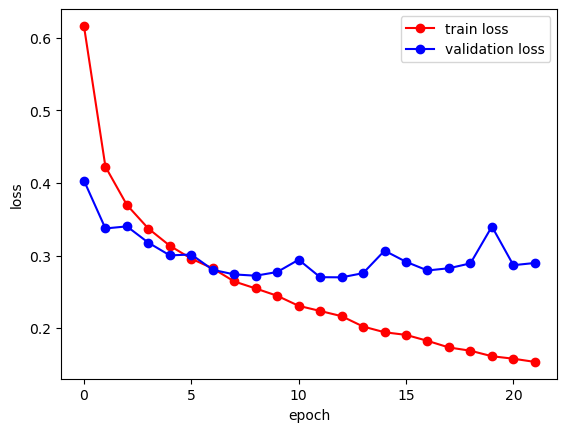

In [53]:
model_conv_fin = ConvNNReg(start_weight = bpCNN['start_weight'])
loss_fn_conv_fin = torch.nn.CrossEntropyLoss()
optimizer_conv_fin = bpCNN2['optimizer'](model_conv_fin.parameters(), lr=bpCNN2['lr'])
trainNN(model_conv_fin, loss_fn_conv_fin, optimizer_conv_fin, 50, 
        activation_function = bpCNN['activation'], printInfo=True, showGraph=True, onEarlyStop=True)

Z grafu je zřejmé, že nejlepší výsledek dosahujeme po 13 epochách. Hodnota ztrátové funkce na validačním datasetu již neklesá a někdy dokonce roste, ale to je pouze kvůli předčasnému zastavení po 9 epochách. Pokud bychom pokračovali v trénování, výsledek by se pravděpodobně ještě mohl zlepšil.

Načteme nejlepší model

In [54]:
model_conv_fin.load_state_dict(torch.load("saves/best_model.pt"))

<All keys matched successfully>

Pro další měření hodnot na evaluačních datech, přepneme model do režimu evaluace pomocí metody `eval()`.

In [55]:
model_conv_fin.eval()

ConvNNReg(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.2, inplace=False)
  (hd1): Linear(in_features=1152, out_features=256, bias=False)
  (hd1_bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hd2): Linear(in_features=256, out_features=128, bias=False)
  (hd2_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hd3): Linear(in_features=128, out_features=64, bias=False)
  (hd3_bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=T

Naměřime přesnost na testovacích datech.

In [118]:
ii = 0
test_predictions = np.zeros(len(Xtest)) #for prediction 
test_y = np.zeros(len(Xtest)) #for real values
for vdata in test_loader:
    vinputs, vlabels = vdata
    #compute outputs and loss
    with torch.no_grad(): 
        voutputs = model_conv_fin(vinputs)
        vloss = loss_fn_conv_fin(voutputs, vlabels)
    #save prediction values
    test_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).numpy()
    #save real values
    test_y[ii:(ii + vinputs.shape[0])] = vlabels.numpy()
    #inc index
    ii += vinputs.shape[0]

#compute accuracy using sklearn     
from sklearn.metrics import accuracy_score
print(f"Testovací přesnost: {accuracy_score(test_y, test_predictions)}")

Testovací přesnost: 0.9007142857142857


Testovací přesnost je téměř stejná jako validační, což je docela dobře. Můžeme předpokládat, že přesnost na nových datech bude přibližně stejná.

Teď naměříme výsledky pro evaluační dataset. Postupujeme stejně jako s trénovacím datasetem, jenom si uložíme proměnnou `ID`, kterou pak přidáme do výsledného souboru.

In [114]:
evaluation = pd.read_csv("evaluate.csv")
index_evaluation = evaluation.ID
evaluation = evaluation.drop("ID", axis = 1)

evaluation = evaluation.to_numpy()
evaluation.shape

(14000, 1024)

Hodnoty labelů naměříme stejně jako v případě testovacích dat. Poté je uložíme do dataframu a ten uložíme do souboru.

In [115]:
evaluation = evaluation.reshape(14000,1,32,32)
dataset_evaluation = torch.tensor(evaluation, dtype = torch.float)
dataset_evaluation
with torch.no_grad():
       predictions = model_conv_fin(dataset_evaluation)
        
prediction_value = predictions.argmax(1).numpy()
results = pd.DataFrame({'ID': index_evaluation, 'label': prediction_value})
results.to_csv('results.csv', index=False)